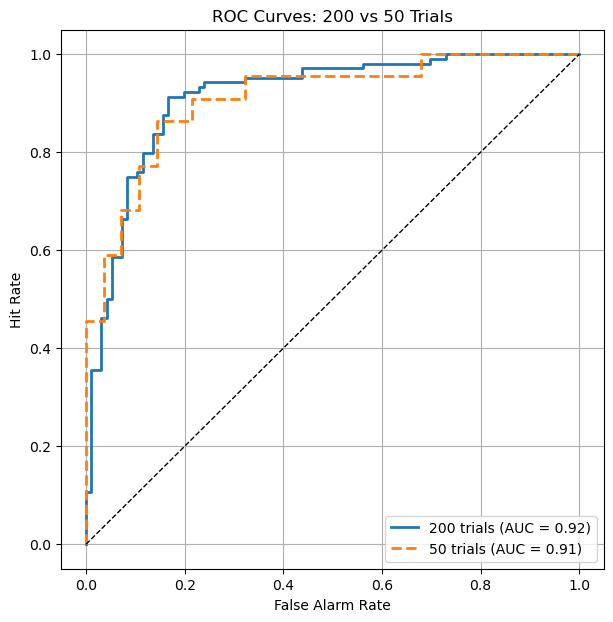

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 시뮬레이션 함수: target이면 1, 아니면 0을 반환
def simulate_trials(n_trials, d_prime, criterion=0):
    mu_signal = d_prime / 2
    mu_noise = -d_prime / 2
    sigma = 1

    is_signal = np.random.rand(n_trials) < 0.5
    evidence = np.where(
        is_signal,
        np.random.normal(mu_signal, sigma, n_trials),
        np.random.normal(mu_noise, sigma, n_trials)
    )

    # ROC 계산을 위해 evidence 그대로 사용
    return evidence, is_signal.astype(int)

# 시뮬레이션 실행
evidence_200, labels_200 = simulate_trials(200, d_prime=1.5)
evidence_50, labels_50 = simulate_trials(50, d_prime=1.5)

# ROC 계산
fpr_200, tpr_200, _ = roc_curve(labels_200, evidence_200)
fpr_50, tpr_50, _ = roc_curve(labels_50, evidence_50)

# AUC (optional)
auc_200 = auc(fpr_200, tpr_200)
auc_50 = auc(fpr_50, tpr_50)

# 그래프 시각화
plt.figure(figsize=(7, 7))
plt.plot(fpr_200, tpr_200, label=f"200 trials (AUC = {auc_200:.2f})", lw=2)
plt.plot(fpr_50, tpr_50, label=f"50 trials (AUC = {auc_50:.2f})", lw=2, linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Chance line

plt.xlabel('False Alarm Rate')
plt.ylabel('Hit Rate')
plt.title('ROC Curves: 200 vs 50 Trials')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
